In [4]:
import numpy as np
import matplotlib.pyplot as plt

Após importar as bibliotecas _numpy_ e _matplotlib.pyplot_, a função _k-means_ foi implementada, conforme especificado no exercício 1.

In [17]:
def kmeans(input_x, num_clusters):
    '''
    Função que aplica a metodologia KMeans para clusterização de dados.
    Dados de entrada:
        input_x: (np.array) dados de entradas a serem clusterizados
        num_clusters: (int) número de grupos de clusterização 
        tol: (float) tolerância maxima do algoritimo de clusterização
    Saída:
        output_x: (np.array) dados de entrada classificados em grupos
    '''
    x_min = np.amin(input_x)
    x_max = np.amax(input_x)
    cluster_centers = np.random.uniform(low=x_min, high=x_max, size=(num_clusters, 2))
    output_x = np.zeros((input_x.shape[0], input_x.shape[1]+1))
    output_x[:,:-1] = input_x
    categories = range(num_clusters)
    means = np.zeros((num_clusters, 2))
    
    x = True
    num_it = 0
    
    while x:
        old_cluster_centers = np.copy(cluster_centers)

        for i in range(input_x.shape[0]):
            dist = []
            for cluster_center in cluster_centers:
                dist.append(np.linalg.norm(input_x[i]-cluster_center))
            output_x[i,-1] = dist.index(min(dist))
            dist
        
        for category in categories:
            in_category = output_x[output_x[:,-1] == category]
            in_category = in_category[:, :-1]
            means[category] = np.mean(in_category, axis=0)
            cluster_centers[category] = means[category]
        
        num_it += 1
        
        if (old_cluster_centers == cluster_centers).all(): 
            x = False
            
    return(output_x, cluster_centers)


Em seguida, definiu uma função para executar a função _kmeans_ e plotar os gráficos dos dados usado para entrada com diferentes desvios padrões e os dados categorizados pelo metodo _K-Means_ com diferentes números de categorias.

In [18]:
def ex1(sd_values, k_values):
    '''
    Função que plota os gráficos pedidos no para o Exercício K-Means
    Dados de entrada:
        sd_values: valores de desvio padrão a serem considerados pelo algorítmo
        k_values: valores de número de categoria 
    '''
    for sd_value in sd_values:
        C1 = (2, 2)
        C2 = (4, 4)
        C3 = (2, 4)
        C4 = (4, 2)
        S = sd_value
        N = 100

        xc1 = np.random.normal(loc=C1, scale=S, size=(N,2))
        xc2 = np.random.normal(loc=C2, scale=S, size=(N,2))
        xc3 = np.random.normal(loc=C3, scale=S, size=(N,2))
        xc4 = np.random.normal(loc=C4, scale=S, size=(N,2))

        x = np.concatenate([xc1, xc2, xc3, xc4])
        
        plt.scatter(x[:,0], x[:,1])
        plt.title(f'Conjunto de dados gerados para uma distribuição sd = {S}', size = 15)
        plt.show()
        ax = range(len(k_values))
        fig, (ax) = plt.subplots(1,3, figsize = (25,7))

        for num, k_value in enumerate(k_values):
            output, cluster_centers = kmeans(x, k_value)
            ax[num].set_title(f'Dados categorizados em {k_value} categorias', size = 15)
            ax[num].set(xlabel='x', ylabel='y')
            ax[num].scatter(output[:,0], output[:,1], c=output[:,-1])
            
        plt.show()

Abaixo podemos verificar os gráficos plotados:

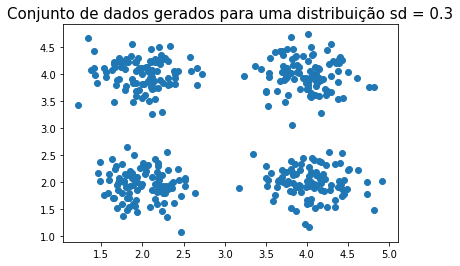

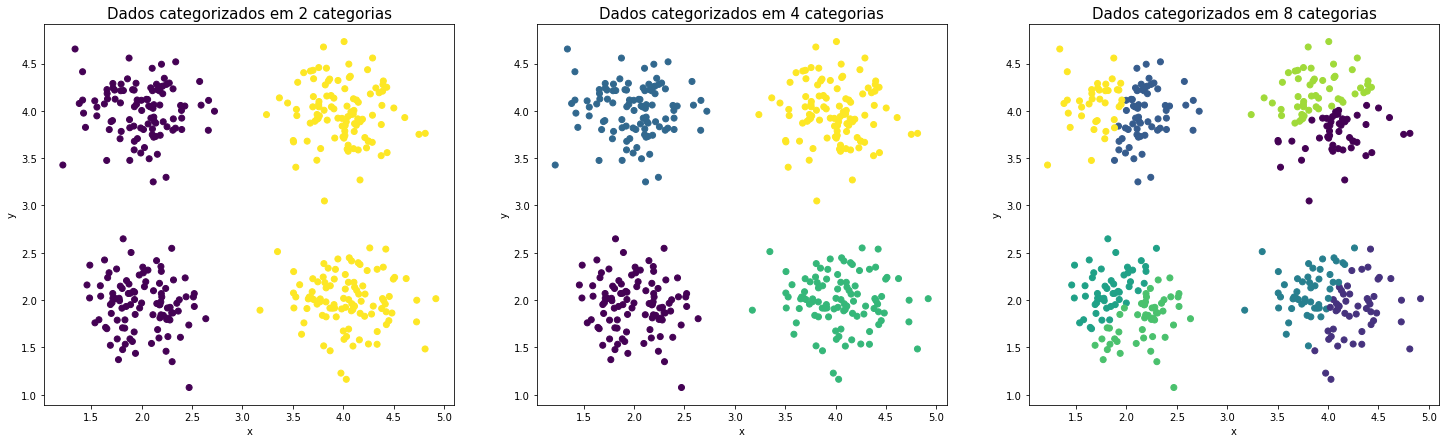

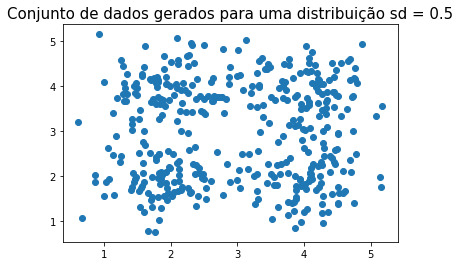

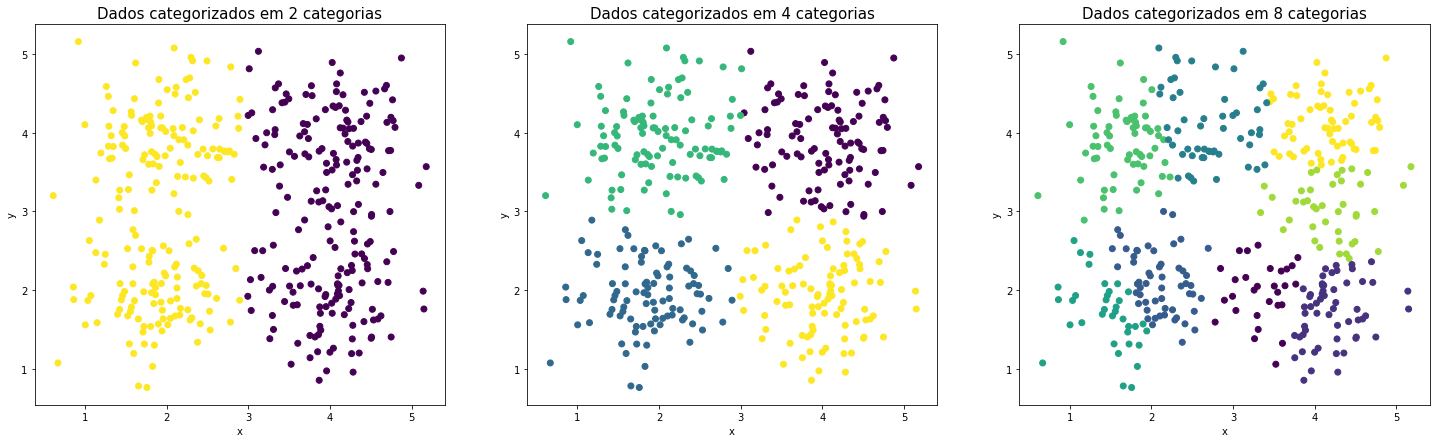

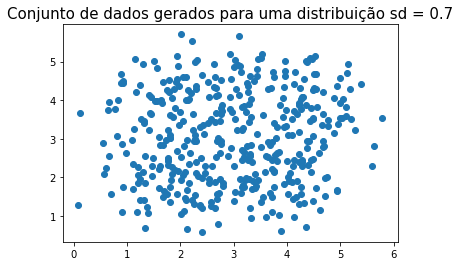

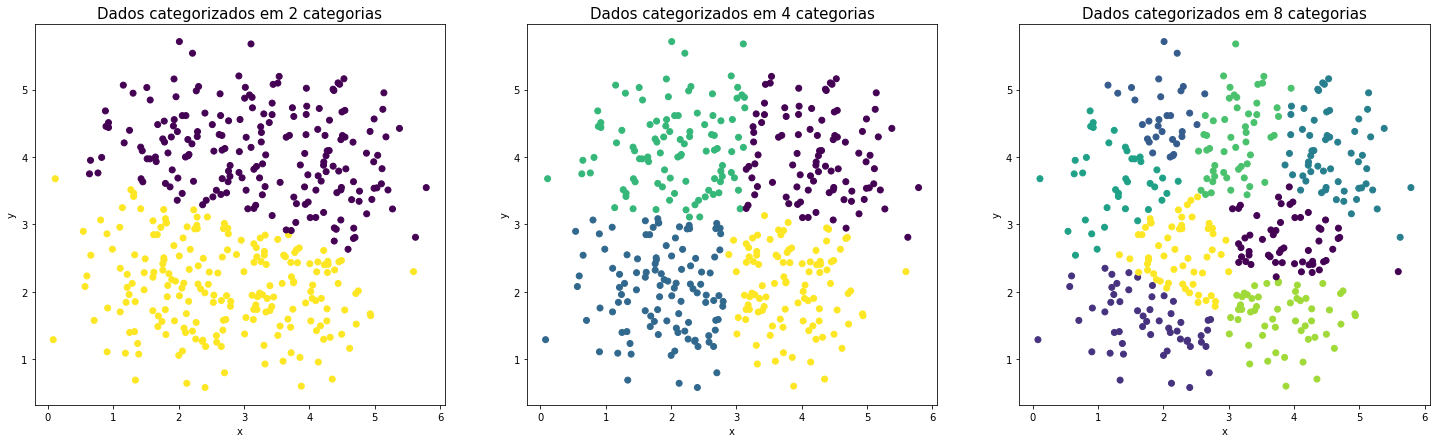

In [20]:
k = [2, 4, 8]
sd = [0.3, 0.5, 0.7]
ex1(sd, k)